# The Game of Life

The Game of Life is a cellular automaton devised by the British mathematician John Horton Conway in 1970. It is a zero-player game, meaning that its evolution is determined by its initial state, requiring no further input. 

Conway’s Game of Life is a process that takes place on an infinite square grid, where each square can be in one of two states: alive or dead. The squares (called cells) then evolve in discrete timesteps (called generations) according to the following two rules:
* If a cell is alive, it survives to the next generation if it has 2 or 3 live neighbors; otherwise it dies.
* If a cell is dead, it comes to life in the next generation if it has exactly 3 live neighbors; otherwise it stays dead.

These rules are applied to every square in the grid simultaneously, and a “neighbor” in refers to any of the 8 cells that it touches either along a side or at a corner.

In [1]:
import matplotlib.pyplot as plt
import numpy.random as npr
from matplotlib.animation import FuncAnimation
from matplotlib import animation
from scipy.signal import convolve2d
import numpy as np
import imageio
from IPython.display import HTML
from IPython.display import Video

#Our custom backend module for gameoflife
from gameoflife.gameoflife import * 
from gameoflife.create_pattern import *

%matplotlib notebook

Let's start by playing Conway's game of life with a generic pattern:

In [2]:
size = [25,25]

In [3]:
ON, OFF =  1, 0 # pixels values
seed = np.zeros(shape=size)

#setting seed
init = [[0,0], [0,1], [0,2], [1,1]]
for x, y in init:
  seed[x,y] = ON

<IPython.core.display.Javascript object>


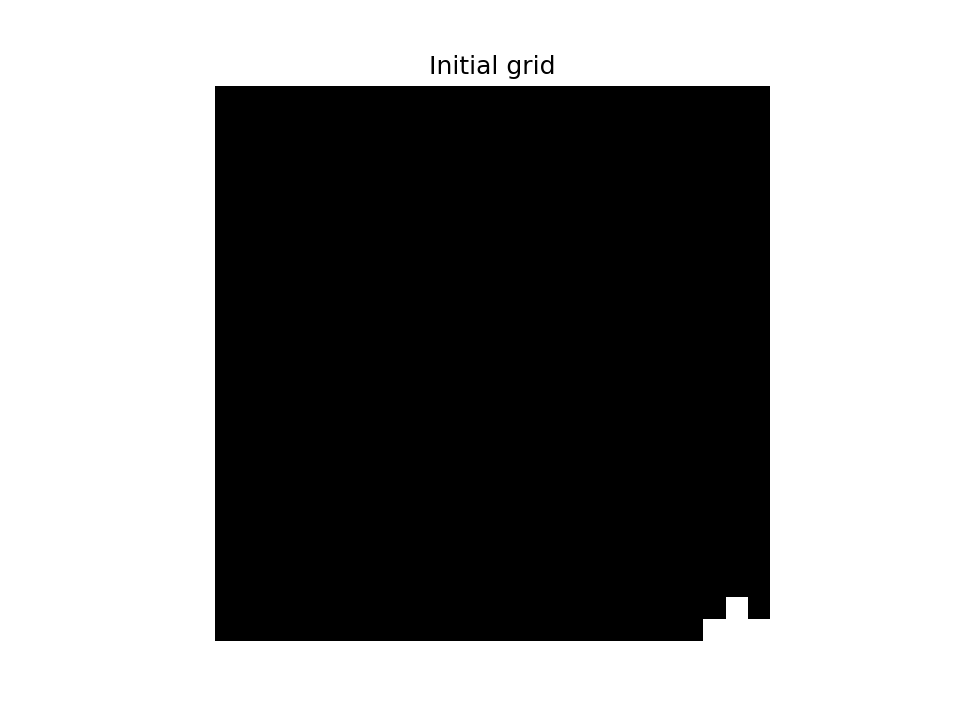

In [4]:
#plotting initial grid
draw_plot(*draw_grid('Initial grid'), seed)

<IPython.core.display.Javascript object>


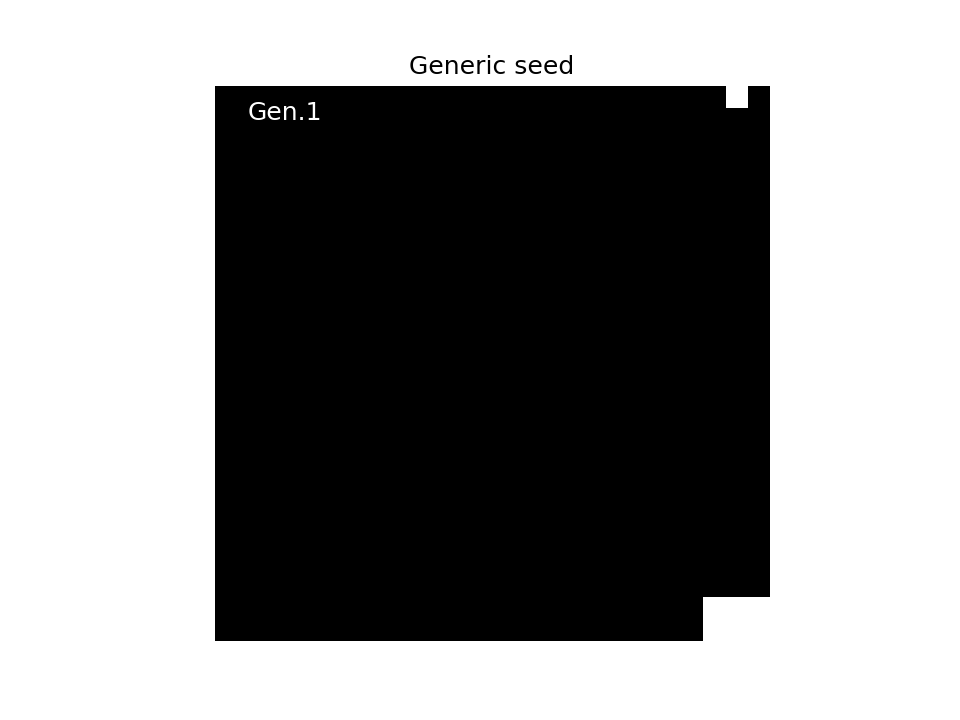

In [5]:
#Play the game
play_gol(seed, 20, 100, 'Generic seed')

<IPython.core.display.Javascript object>


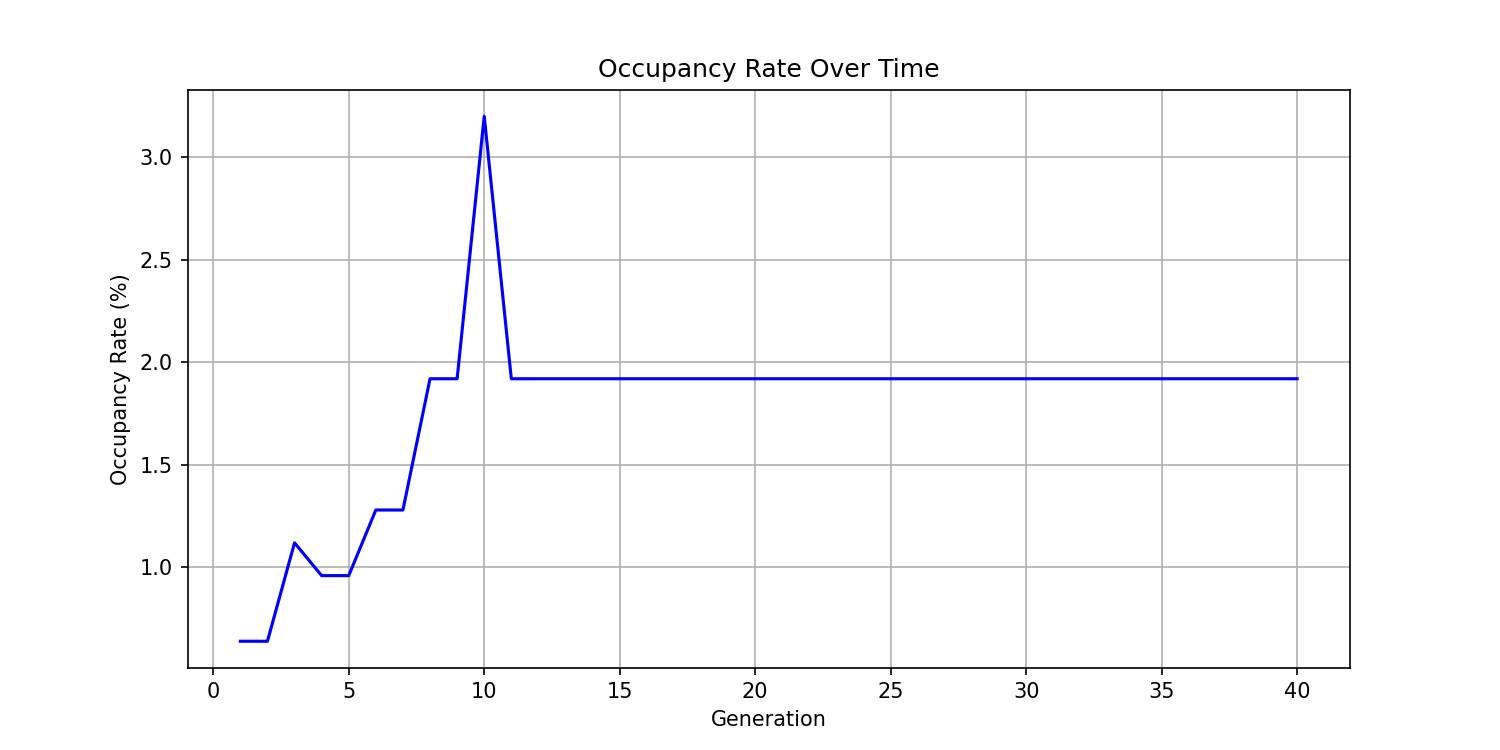

In [6]:
occupancy_rate(seed, n_gens=40)

-----------------

## Examples of patterns 

Many different types of patterns occur in the Game of Life, which are classified according to their behaviour.

### Still lifes

A still life is a pattern that does not change from one generation to the next, there are many naturally occurring still lifes in Conway's Game of Life. A random initial pattern will leave behind a great deal of small oscillators and a large variety of still lifes. 

Let's play Conway's Game of Life with a still life:

In [7]:
flower = np.array([[0, 1, 0], 
                   [1, 0, 1], 
                   [0, 1, 0]])

<IPython.core.display.Javascript object>


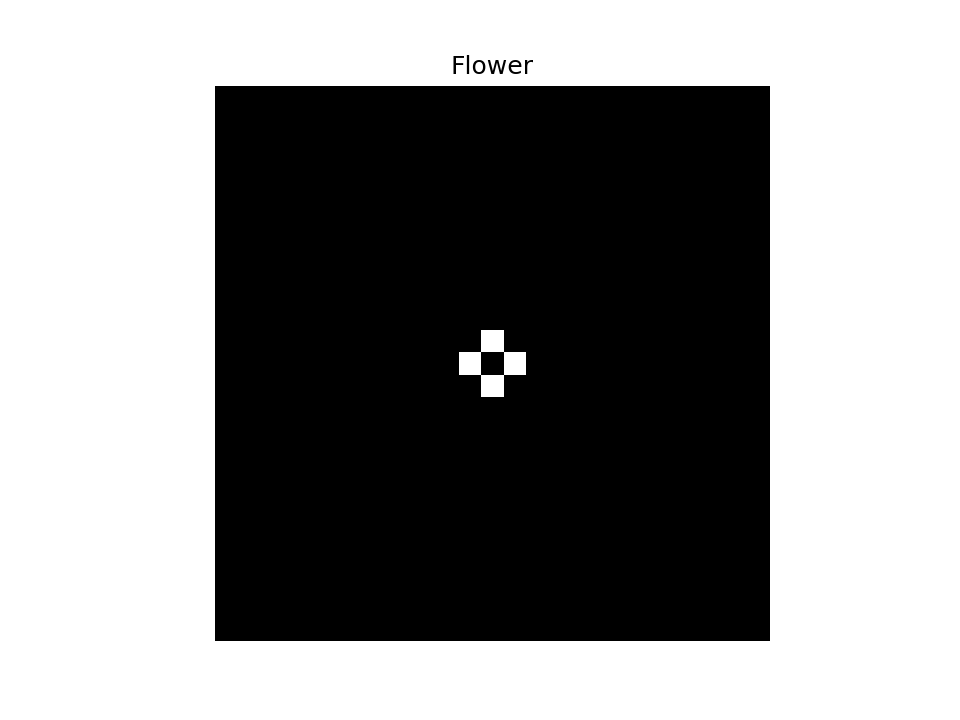

In [8]:
seed = create_pattern(size, flower)
#plotting initial grid
draw_plot(*draw_grid('Flower'), seed);

<IPython.core.display.Javascript object>


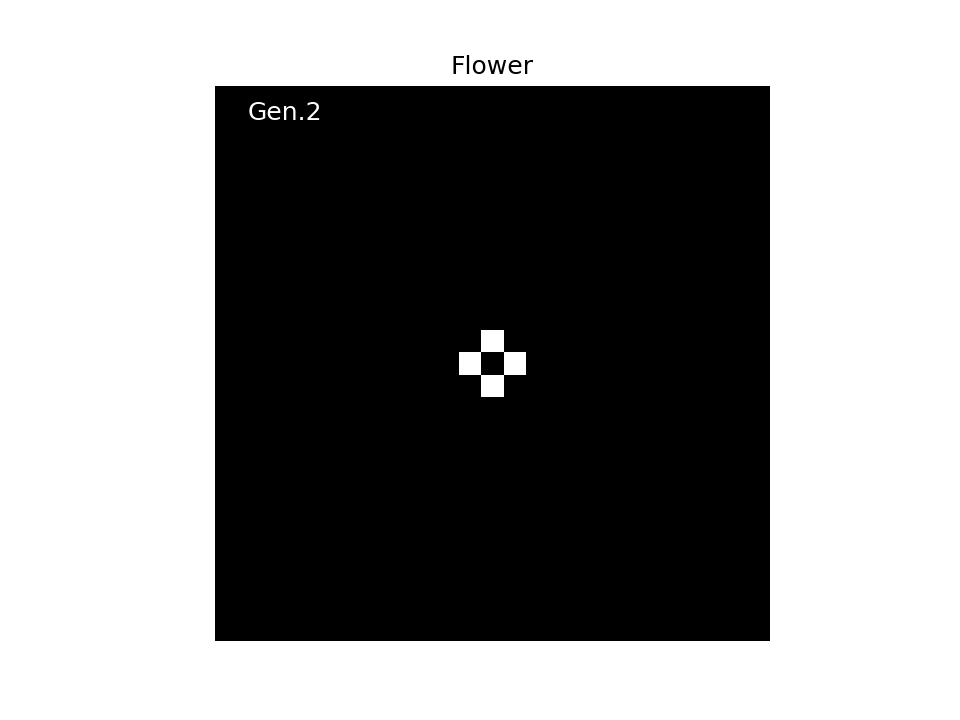

In [9]:
# play the game
play_gol(seed, 15, 300, 'Flower') # delta_t = 300 ms

In [10]:
period_of_replication(flower, size, n_gens=40)

Pattern repeated after 1 generations


<IPython.core.display.Javascript object>


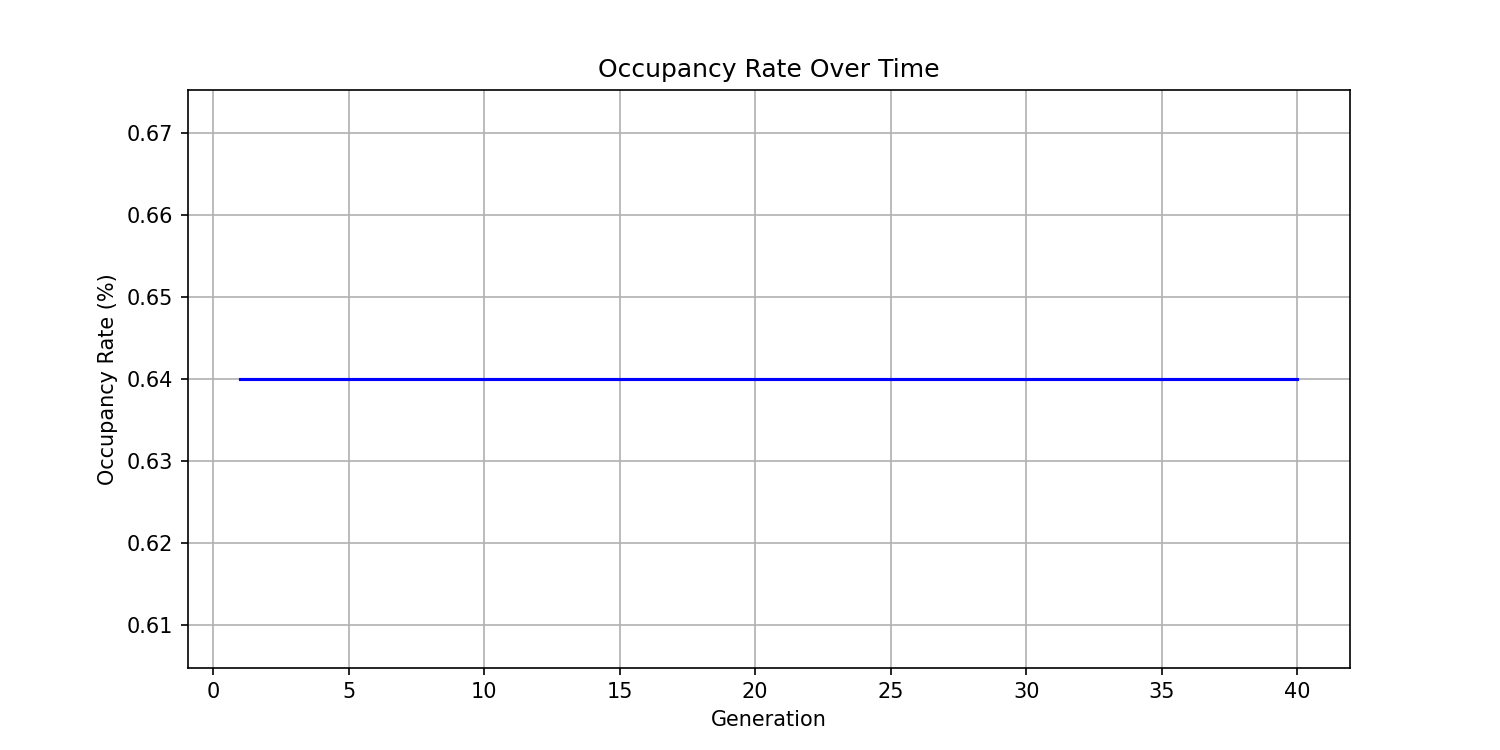

In [11]:
occupancy_rate(seed, n_gens=40)

Let's see what happens if we introduce some noise to the seed

<IPython.core.display.Javascript object>


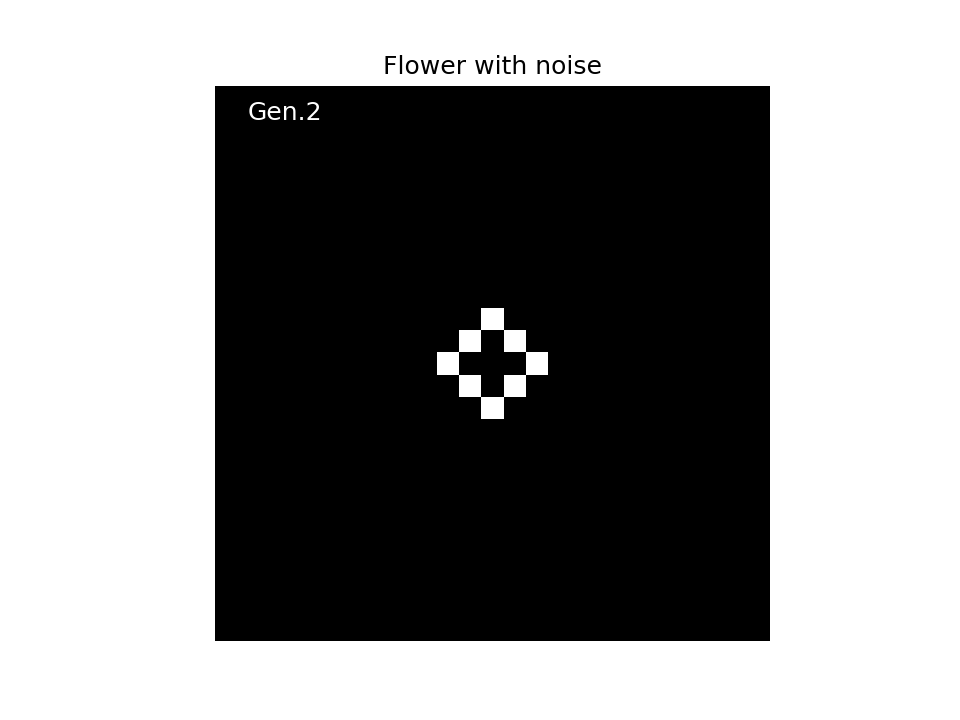

In [12]:
seed = create_pattern(size, flower, noise=True)
play_gol(seed, 15, 100, 'Flower with noise') # delta_t = 300 ms

--------------

### Oscillators

An oscillator is a pattern that is a predecessor of itself. That is, it is a pattern that repeats itself after a fixed number of generations (known as its period). The term is usually restricted to finite patterns that are not still lifes, though still lifes may be thought of as oscillators with period one. Finite oscillators are known to exist for all periods. 

Let's play Conway's Game of Life with an oscillator:

In [13]:
toad = np.array([[0, 0, 0, 0],
                 [0, 1, 1, 1], 
                 [1, 1, 1, 0],
                 [0, 0, 0, 0]])

<IPython.core.display.Javascript object>


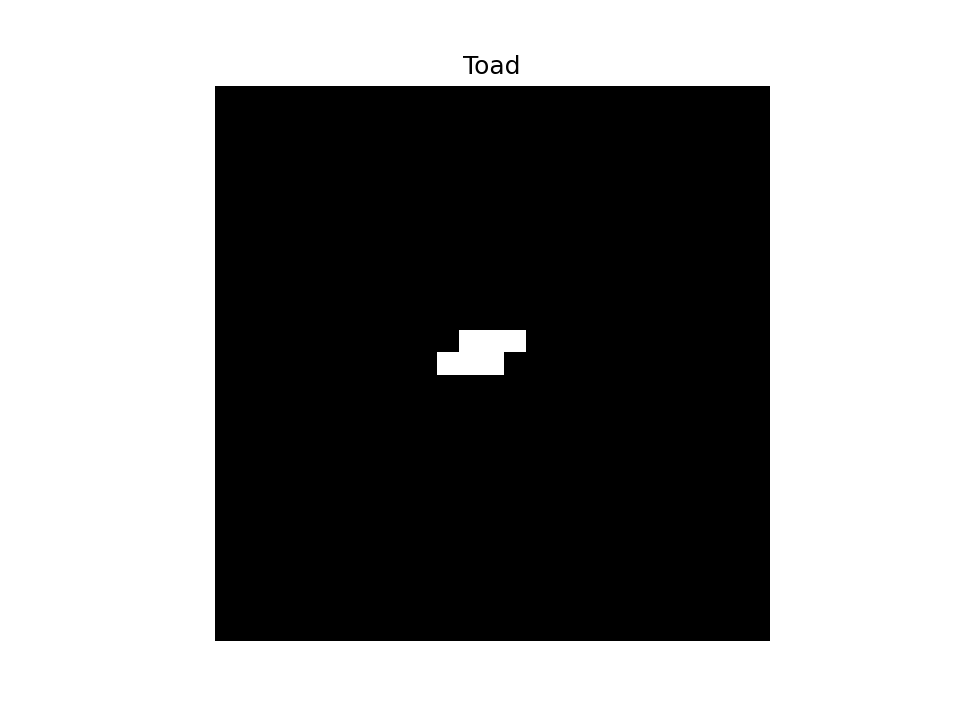

In [14]:
seed = create_pattern(size, toad)
#plotting initial grid
draw_plot(*draw_grid('Toad'), seed)

<IPython.core.display.Javascript object>


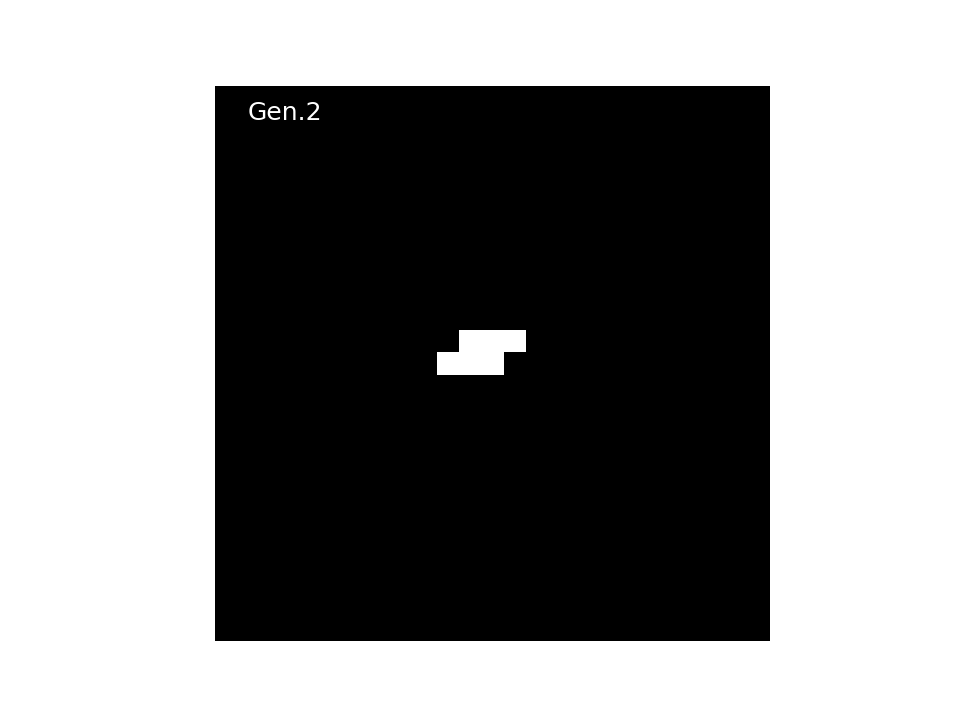

In [15]:
# play the game
play_gol(seed, 15, 300) # delta_t = 300 ms

In [16]:
period_of_replication(toad, size, n_gens=40)

Pattern repeated after 2 generations


<IPython.core.display.Javascript object>


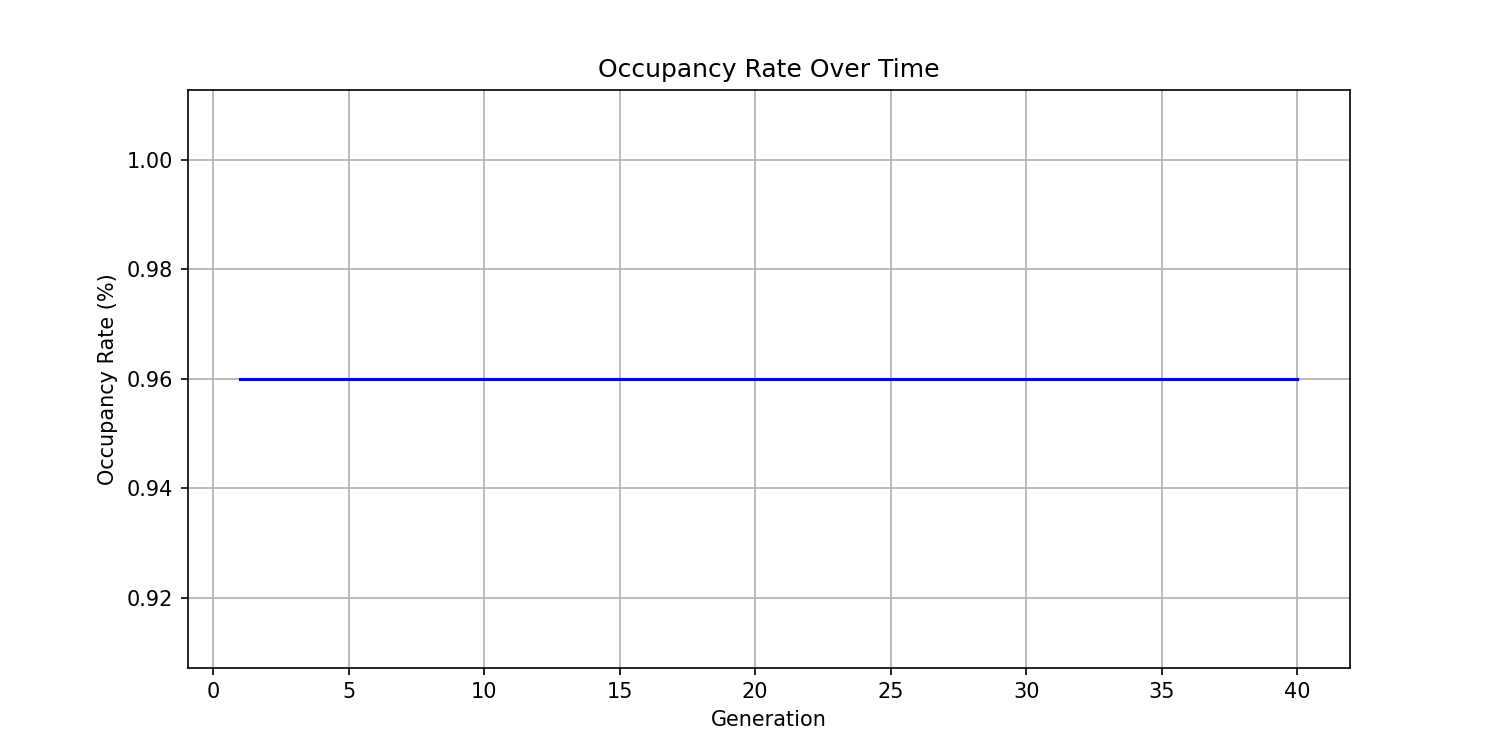

In [17]:
occupancy_rate(seed, n_gens=40)

Let's see what happens if we introduce some noise to the seed

<IPython.core.display.Javascript object>


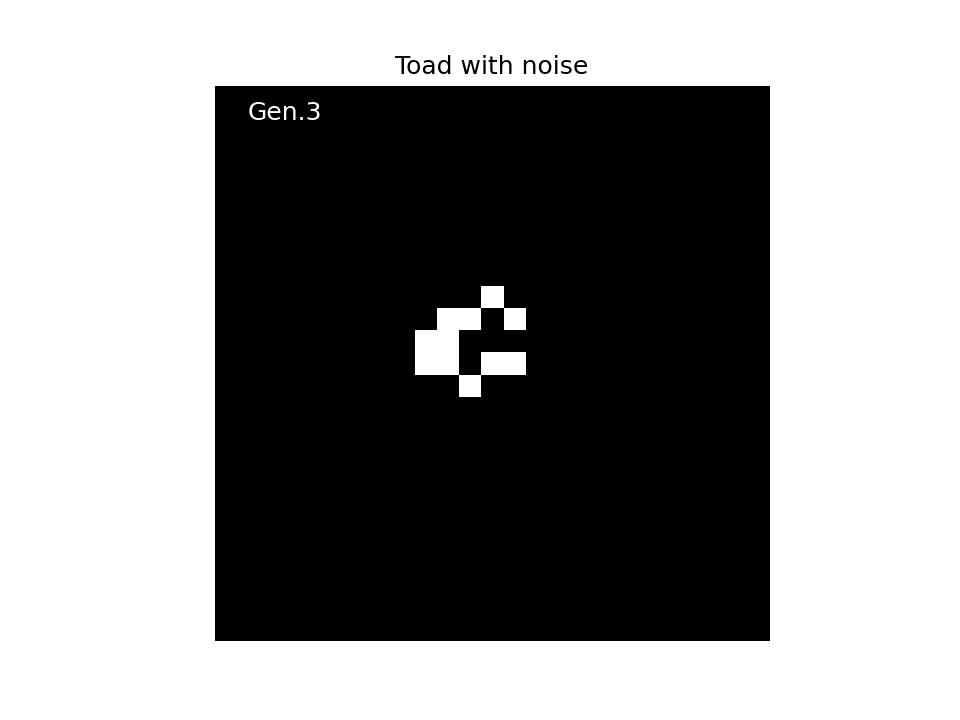

In [18]:
seed = create_pattern(size, toad, noise=True)
play_gol(seed, 15, 300, 'Toad with noise') 

---------------

## Spaceships

A finite pattern is called a spaceship if it reappears after a certain number of generations in the same orientation but in a different position. The smallest such number of generations is called the period of the spaceship.

If a spaceship in a 2D automaton with the Moore neighborhood is translated by $(x,y)$ after $n$ generations, then its speed is defined as:

$$
    v = \frac{\max(|x|,|y|)}{n} c
$$

The most well known spaceship is the glider, discovered in 1969 by the British Matematician Richard Kenneth Guy, named by Conway himself due to a property it exhibits called 'glide symmetry'. Gliders are the smallest spaceships known to exist. Let's play Conway's Game of Life with a glider:

In [19]:
glider = np.array([[1, 1, 1],
                   [0, 0, 1],
                   [0, 1, 0]])

<IPython.core.display.Javascript object>


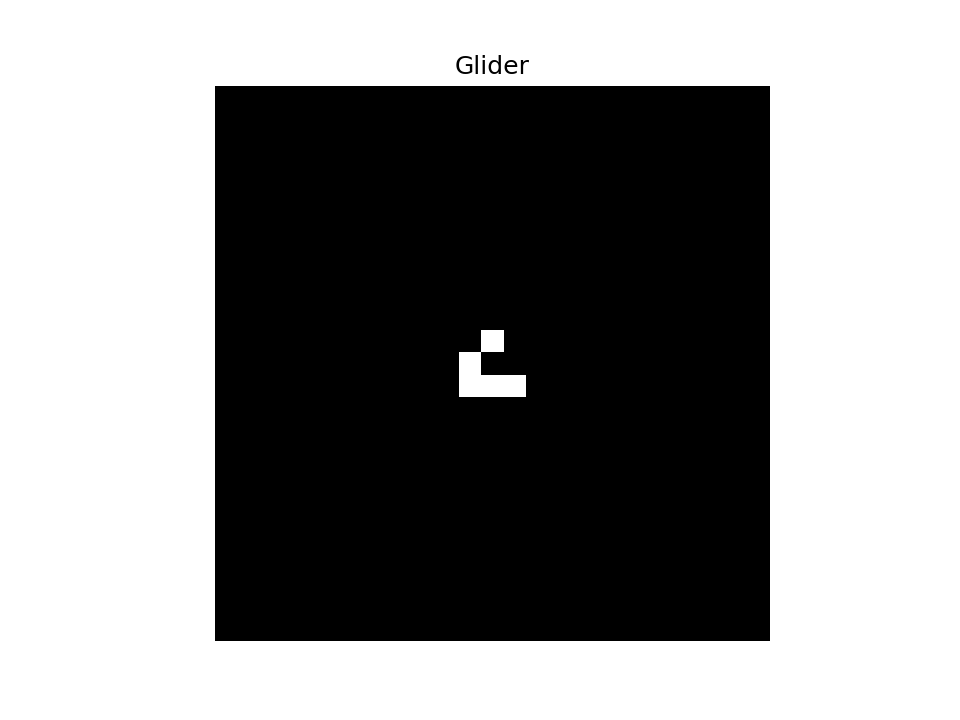

In [20]:
seed = create_pattern(size, glider)
#plotting initial grid
draw_plot(*draw_grid('Glider'), seed)

<IPython.core.display.Javascript object>


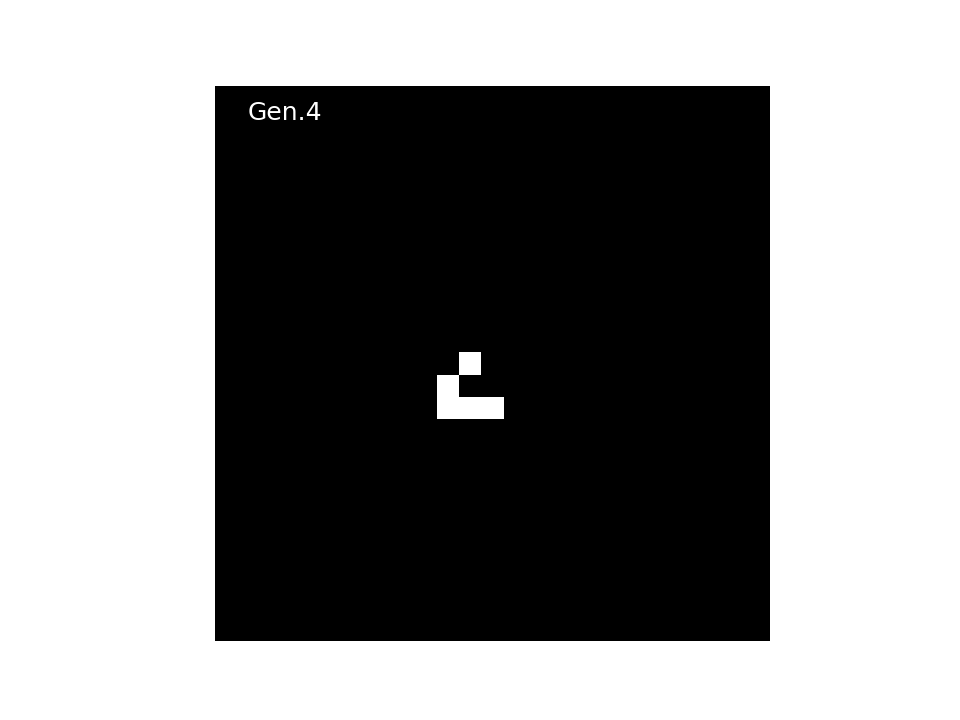

In [21]:
# play the game
play_gol(seed, 20, 50) # delta_t = 50 ms

In [22]:
period_of_replication(glider, size, n_gens=4)

Pattern repeated after 4 generations


<IPython.core.display.Javascript object>


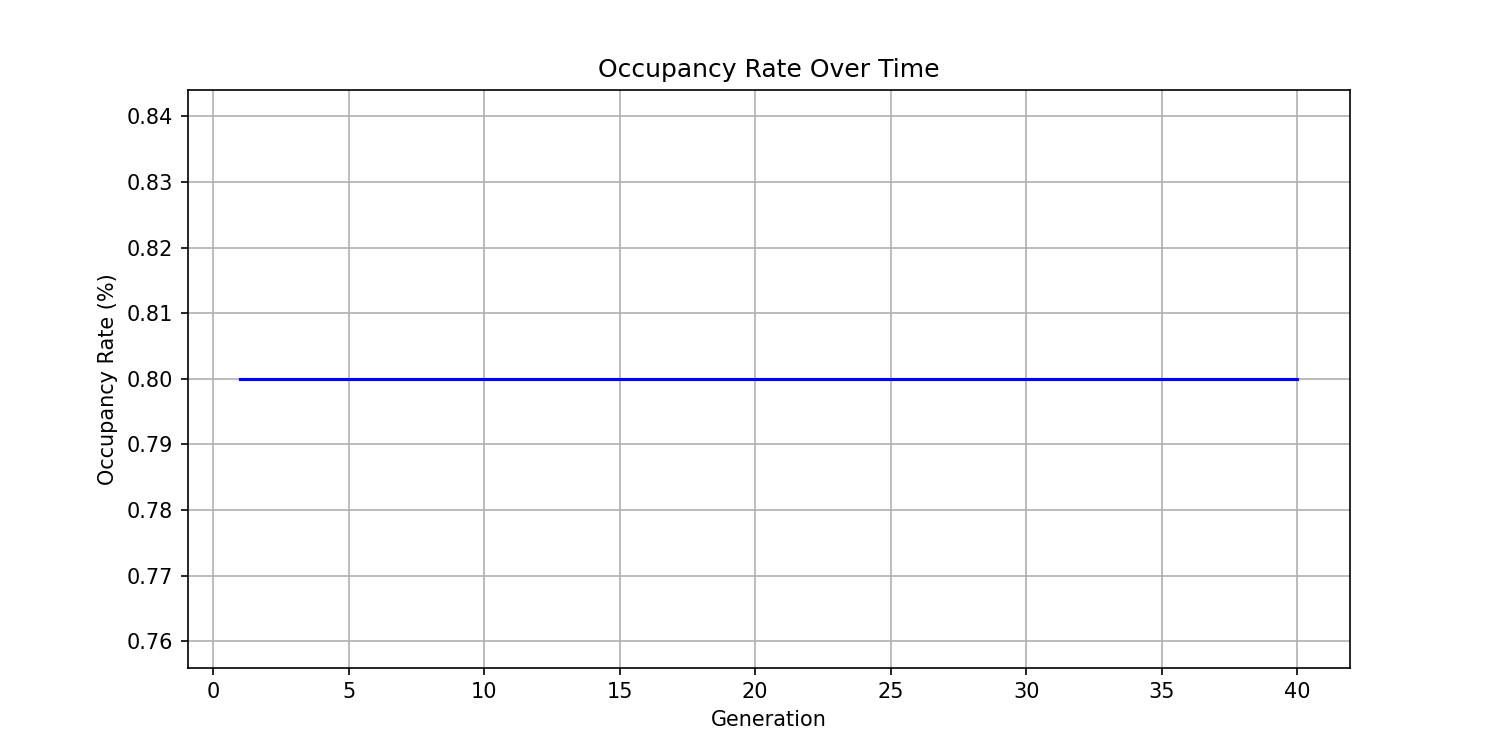

In [23]:
occupancy_rate(seed, n_gens=40)

Let's see what happens if we introduce some noise to the seed

<IPython.core.display.Javascript object>


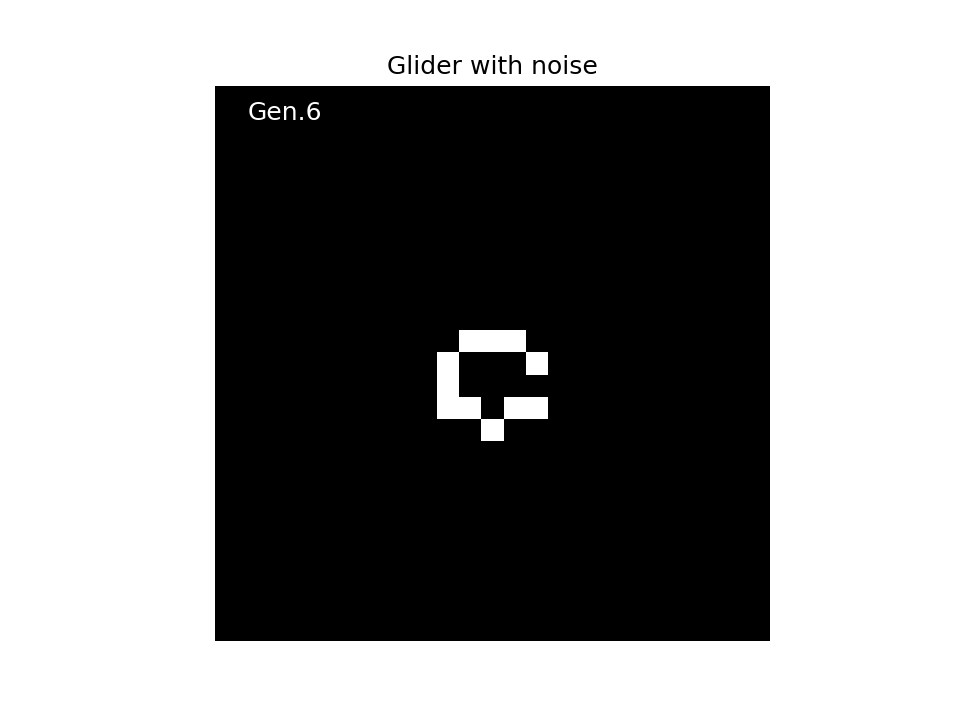

In [24]:
seed = create_pattern(size, glider, noise=True)
play_gol(seed, 15, 30, 'Glider with noise') 

------

### Gosper glider gun

Conway originally conjectured that no pattern could grow indefinitely and decided to offer a prize of fifty dollars (equivalent to $380 in 2022) to the first person who could prove or disprove the conjecture before the end of 1970. The prize was won in November by a team from the Massachusetts Institute of Technology, led by Bill Gosper, who responded with what is now known as the "Gosper glider gun", an oscillator that, every 30 generations, spawns a new glider. This is the first known gun and the first known finite pattern with unbounded growth.

In [25]:
size = [50, 90]
gun = pattern_db['gosperglidergun']
seed = create_pattern(size, gun)

<IPython.core.display.Javascript object>


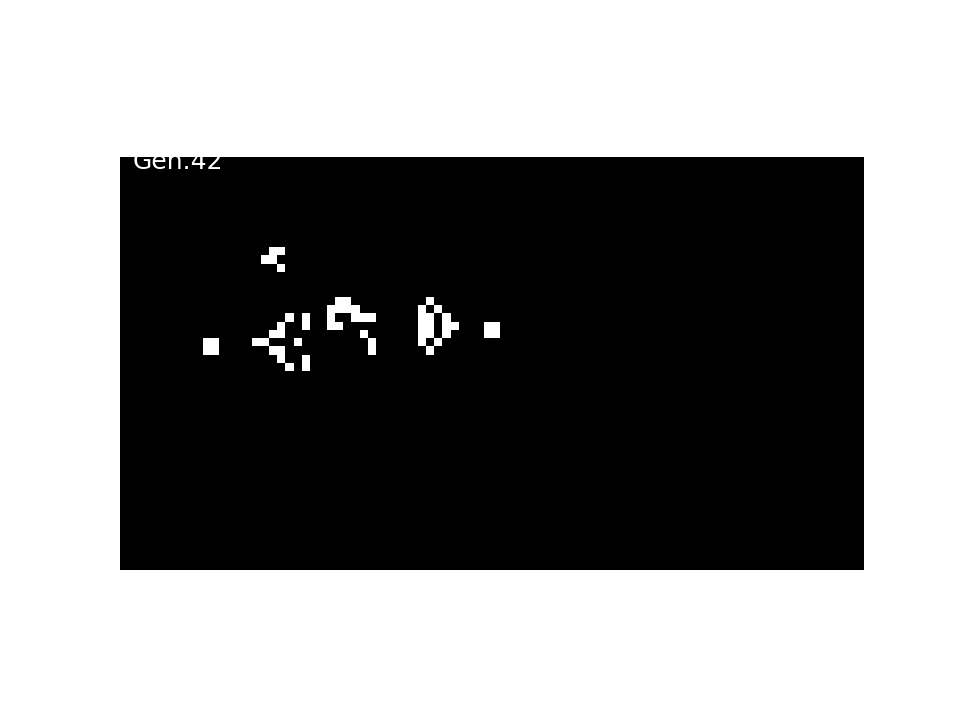

In [26]:
play_gol(seed, 60, 20) # delta_t = 20 ms

<IPython.core.display.Javascript object>


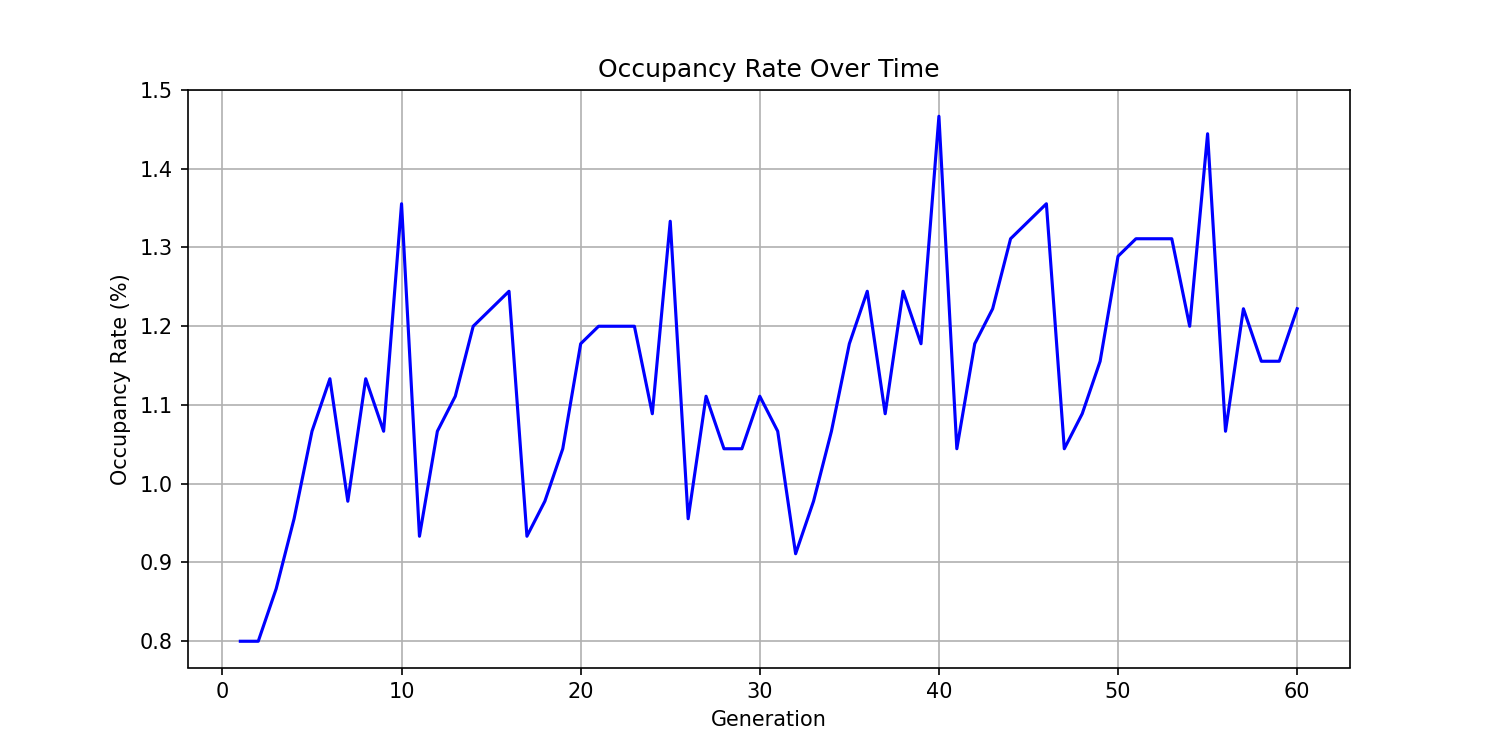

In [27]:
occupancy_rate(seed, n_gens=60)

--------

# Stochastic Game of Life

Now we see what happens if noise is introduced in the dynamics instead of the seed. The dynamics is now parametrized monotonically by a fictitious temperature $T$

The analysis is based on the paper [Schulman, L.S., Seiden, P.E. Statistical mechanics of a dynamical system based on Conway's game of Life. J Stat Phys 19, 293–314 (1978)](https://link.springer.com/article/10.1007/BF01011727) 

We extend the dynamics to a stochastic paradigm, where the usual Conway rules are the $T=0$ temperature limit.
We rewrite Conway rules in terms of birth ($B$) and survival probabilities ($S$), that is:

$P_S^{(k=2)}=P_S^{(3)}=P_B^{(3)}=1$

Where $k$ is the number of alive neighbors. The stochastic version of the rules introduces thermal noise as:

$P_{\alpha}^{(k)}(T)=(P_{\alpha}^{(k)}(0)+\rho T)/(1+T)$

Where $\rho$ is the global density of alive cells

To see the effect of noise defined in this way we look at a glider gun at low and high temperature

In [28]:
size = [50, 90]
pattern = pattern_db['gosperglidergun']
seed = create_pattern(size, pattern, offset=[-10,-10])

$T\rightarrow0$

<IPython.core.display.Javascript object>


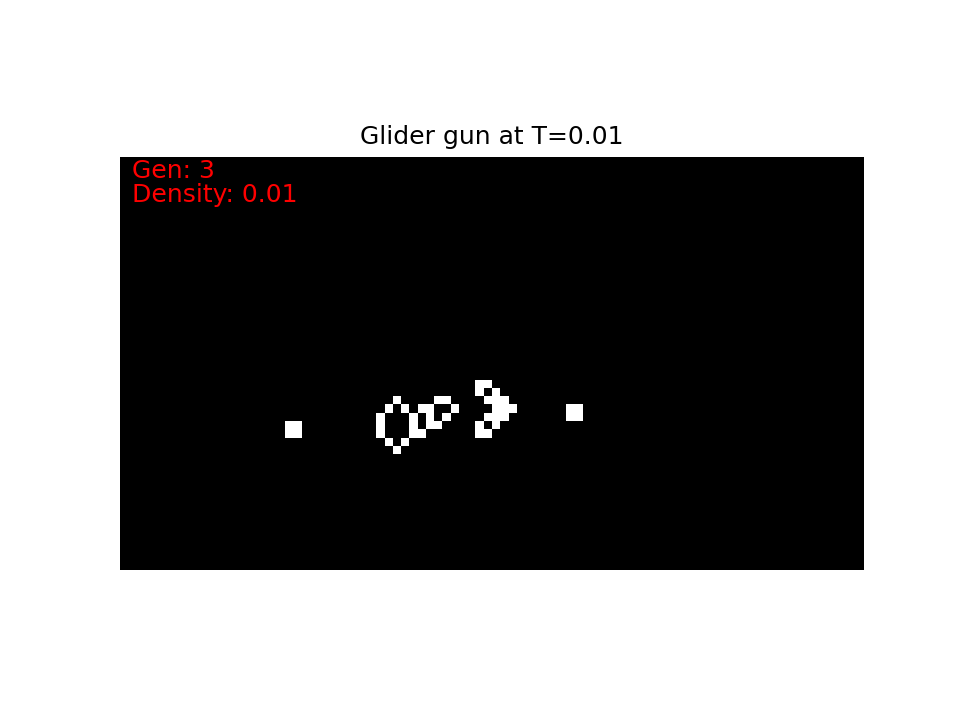

In [29]:
temperature = 0.01
play_statgol(seed, 15, 100, f'Glider gun at T={temperature}', temp=temperature)

$T\rightarrow\infty$

<IPython.core.display.Javascript object>


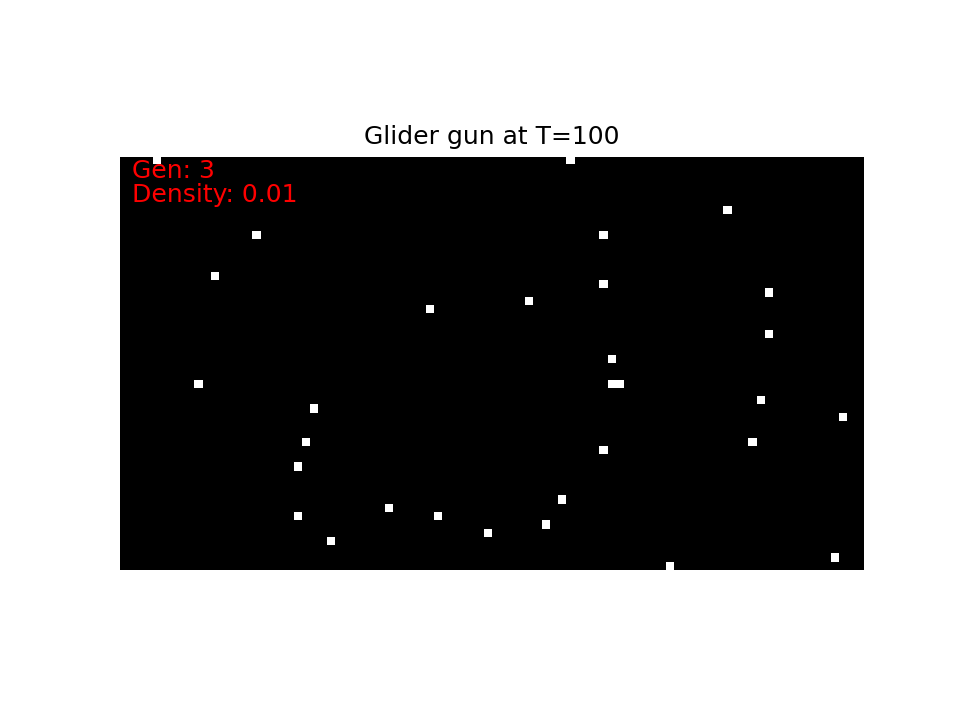

In [30]:
temperature = 100
play_statgol(seed, 15, 300, f'Glider gun at T={temperature}', temp=temperature)

By running the algorithm with a random seed for a long time and plotting the average life density at infinity $\rho(\infty)$ (i.e. at generation $t>>1$) over the temperature $T$ we see that, as shown in the paper, the model displays a critical temperature, as in there is a discrete jump in the average density, which has to be close zero but nonzero at low temperature precisely because of the emergence of local patterns. Above the critical point the equilibrium density stabilizes instead at a value slightly below half but is purely the result of random noise

In [31]:
density=np.load('./data/density_[-2, 1]bounds_1runs_100iter_10steps.npy')
temp=np.load('./data/temperature_[-2, 1]bounds_1runs_100iter_10steps.npy')

<IPython.core.display.Javascript object>


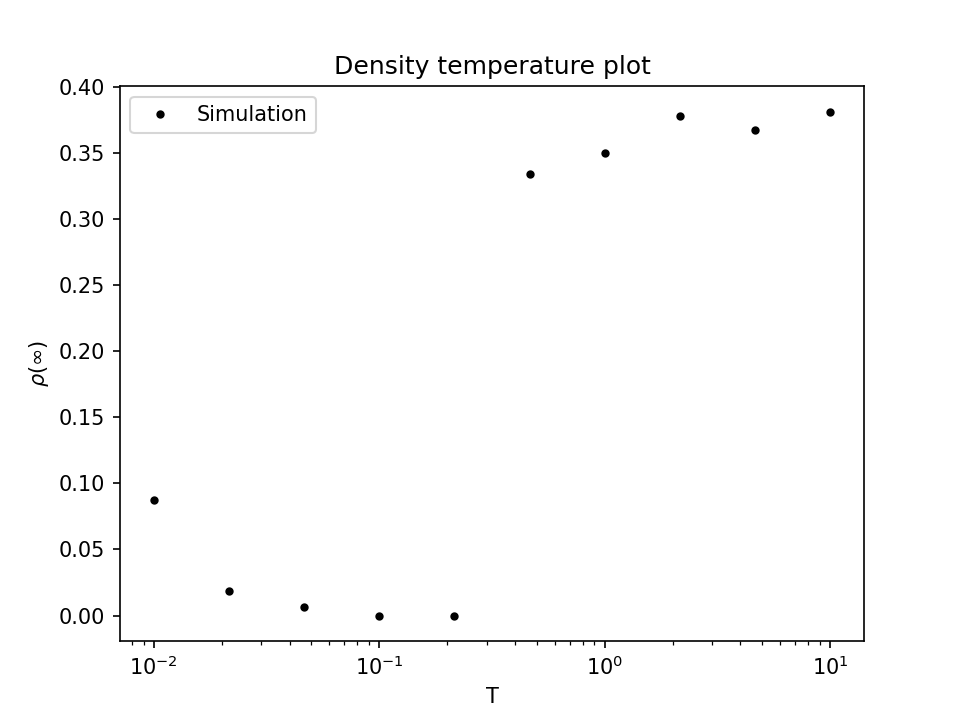

In [32]:
plot_density(temp, density)

----------------

# Universal computer

A universal computer in a cellular automaton is a system that can compute anything that a Turing machine can compute. In 1982, John Conway proved that the Game of Life has a (finite) universal computer, as well as a universal constructor. Proving the universality of a cellular automaton with simple rules was in fact Conway's aim in Life right from the start. 

In 2000, Paul Rendell created a Turing machine within the Game of Life, proving its Turing completeness. This construction essentially emulates the behavior of a universal Turing machine using the evolving patterns and states of the cells in the Game of Life.

## Wires and gates

Electrical pulses going along input wires can be implemented with a glider gun that generates a stream of gliders. Generally speaking, a stream of gliders can encode any data. For example, the number "101" will be a series "glider - no glider - glider". We also want to control glider streams according to the data they carry.

In order to build a logical gate we will need the following four components: input, glider guns, stoppers, and outputs. By combining inputs and guns it is possible to control the streams of gliders generated by the inputs. Stoppers are used only to
prevent the streams of gliders from propagating outside the gate. The output is used to check the presence of gliders that result from the computation.

### NOT gate

Since NOT is an unary operator, its implementation is the simplest one. We only need an input component (A), a perpendicular gun (G) and an output (O). The gun will activate the output unless A prevents it from doing so.

In [ ]:
size = [120, 120]
gun = pattern_db['notgate']
seed = create_pattern(size, gun)

# as seen as the computation time of implementing GoL with these seeds is quite big, we've decided to use pygame
# below there's a gif representing the output obtained with the program we wrote using pygame

![SegmentLocal](notgate.gif "NOT gate")

### AND gate

The AND gate requires two input components (A - B), an output (O) and a simple gun (G). The B gliders will move forward and join the output only if both A and B input variables are true. A stopper is placed opposite the gun to stop the gun's gliders if both inputs are false.

In [ ]:
size = [60, 180]
gun = pattern_db['andgate']
seed = create_pattern(size, gun)

In the gif below there's a representation of all the possible outcomes:

![SegmentLocal](andgate.gif "AND gate")

### OR gate

The OR-gate is slightly more complex, it requires two input components (A - B) and an output (O). However, now two guns are needed, one parallel to the input and one perpendicular. The gliders emitted by the parallel gun will join the output unless both inputs are false. A stopper is positioned on the trajectory B to stop the B gliders when A is false. The output resides on the trajectory of the gliders emitted by the parallel gun. 

In [ ]:
size = [150, 510]
gun = pattern_db['orgate']
seed = create_pattern(size, gun)

In the gif below there's a representation of all the possible outcomes:

![SegmentLocal](orgate.gif "OR gate")